In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import pandas as pd
from sklearn.preprocessing import LabelEncoder 

from sklearn.cluster import SpectralClustering
#from sklearn.datasets.samples_generator import make_blobs

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as split

import matplotlib.cm as cm

import seaborn as sns

In [2]:
CANCER_DATA_PATH = "cancer.csv"
SPAM_DATA_PATH = "spam.csv"

def read_cancer_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    data = pd.read_csv(path_to_csv)
    X = data[data.columns.difference(["label"])]
    le = LabelEncoder() 
    y = np.array(le.fit_transform(data["label"]))
    return X, y   



def read_spam_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    data = pd.read_csv(path_to_csv)
    X = data[data.columns.difference(["label"])]
    y = data["label"]
    return X, y

X_cancer, y_cancer = read_cancer_dataset(CANCER_DATA_PATH)
X_spam, y_spam = read_spam_dataset(SPAM_DATA_PATH)

scaler = MinMaxScaler()
scaler.fit(X_cancer)
X_cancer = pd.DataFrame(scaler.fit_transform(X_cancer), columns=X_cancer.columns)
 
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X_cancer)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 0.215072
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.537514
[t-SNE] KL divergence after 1550 iterations: 0.866581


Text(0.5, 1.0, 'True clustering')

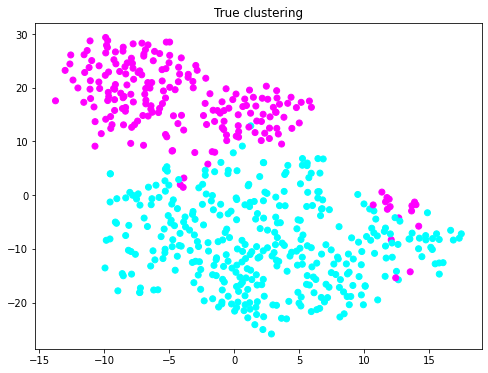

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

plt.scatter(Y[:,0], Y[:,1], c=y_cancer, cmap="cool")

plt.title("True clustering")

#plt.show()

#plt.savefig("True.png")

In [4]:
sc = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
sc.fit(X_cancer)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

Text(0.5, 1.0, ' Spectral Clustering, k = 2 ')

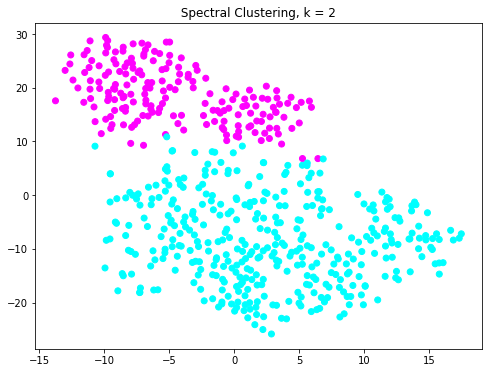

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)


labels = sc.labels_

plt.scatter(Y[:,0], Y[:,1], c=labels, cmap="cool")

plt.title(" Spectral Clustering, k = 2 ")

#plt.savefig("Sk_2.png")
#plt.show()

 

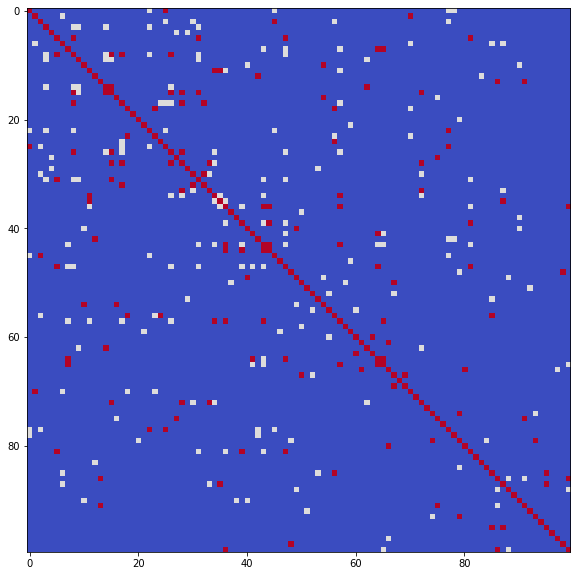

In [8]:
fig = plt.figure(figsize=(10,10))
#l = pd.DataFrame(generate_laplacian(a))
#sns.set(font_scale=2)
#sns.heatmap(sc.affinity_matrix_.toarray(), annot=True, cmap="coolwarm")

plt.imshow(sc.affinity_matrix_.toarray()[:100, :100], cmap="coolwarm" )

plt.savefig("affinity.png")

In [ ]:
fig = plt.figure(figsize=(10,10))
#l = pd.DataFrame(generate_laplacian(a))
#sns.set(font_scale=2)
#sns.heatmap(sc.affinity_matrix_.toarray(), annot=True, cmap="coolwarm")

plt.imshow(sc.affinity_matrix_.toarray()[:100, :100], cmap="coolwarm" )

plt.savefig("affinity.png")

In [14]:
j = sc.affinity_matrix_.toarray()

In [15]:
from sklearn.utils import shuffle
from sklearn.metrics.pairwise import rbf_kernel

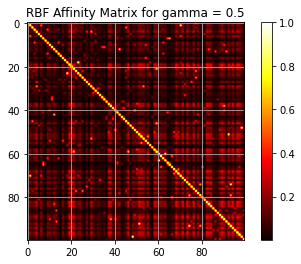

In [18]:



Ks = rbf_kernel(j[:100, :100], j[:100, :100], gamma=0.5)

plt.imshow(Ks, cmap='hot')
plt.colorbar()
plt.title('RBF Affinity Matrix for gamma = ' + str(0.5))
plt.grid('off')
#plt.show()

plt.savefig("affinity1.png")

In [ ]:
fig = plt.figure(figsize=(20,10))
a = 
l = pd.DataFrame(generate_laplacian(pd.DataFrame(a)) )
sns.set(font_scale=2)
sns.heatmap(l, annot=True, cmap="coolwarm")

In [ ]:
f = plt.figure(figsize=(8, 6))
f.add_subplot(2, 2, 1)
for i in range(2, 6):
    sc = SpectralClustering(n_clusters=i,affinity="nearest_neighbors").fit(X_cancer)
    f.add_subplot(2, 2, i-1)
    plt.scatter(Y[:,0], Y[:,1], s=5, c=sc.labels_, label="n_cluster-"+str(i), cmap = "spring")
    plt.legend()

plt.savefig("Different_k.png")

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

X = X_cancer
y = y_cancer
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1 ) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    
    clusterer=  SpectralClustering(n_clusters=n_clusters,affinity="nearest_neighbors") 
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

 
plt.savefig("sil.png")
#plt.show()

In [ ]:
SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=3, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None) 